In [369]:
from matplotlib import pyplot
from matplotlib.path import Path
import numpy as np
from random import uniform

In [370]:
radiusMin = 3
radiusMax = 8
edges_count = 10
x_offset = 3
y_offset = -5

In [371]:
def get_radius():
    return uniform(radiusMin, radiusMax)

def function(x, y):
    return x**3 + y**2

In [372]:
angles = np.linspace(0, 2*np.pi, edges_count)
x_list = [x_offset + get_radius()*np.cos(x) for x in angles]
y_list = [y_offset + get_radius()*np.sin(x) for x in angles]

min_x = min(x_list)
max_x = max(x_list)

max_y = max(y_list)
min_y = min(y_list)

In [373]:
def is_inside(x, y, x_list = x_list, y_list = y_list):
    edges = zip(x_list, y_list)
    path = Path(list(edges))
    return path.contains_point((x, y))


def get_random_points(count, min_x = min_x, max_x = max_x, min_y = min_y, max_y = max_y):
    points = []
    for i in range(count):
        x = uniform(min_x, max_x)
        y = uniform(min_y, max_y)
        points.append((x, y))
    return points

In [374]:
def generate_points_and_show_result(count):
    points = get_random_points(count)
    points_inside = []
    points_outside = []

    function_values_sum = 0

    for x, y in points:
        if(is_inside(x, y)):
            function_values_sum += function(x, y)
            points_inside.append((x, y))
        else:
            points_outside.append((x, y))

    total_area = (max_x - min_x) * (max_y - min_y)
    calculated_area = total_area * len(points_inside) / count
    integral_value = function_values_sum / len(points_inside)  * calculated_area

    pyplot.title(f"Results for {count} points")
    pyplot.plot(x_list + [x_list[0]], y_list + [y_list[0]])
    pyplot.scatter(*zip(*points_inside), s=4, c='green')
    pyplot.scatter(*zip(*points_outside), s=4, c='red')
    
    print(f"Results for {count} points:")
    print(f"Total area: {total_area}")
    print(f"Calculated area: {calculated_area}")
    print(f"Integral value: {integral_value}")


Results for 15 points:
Total area: 112.13285627525768
Calculated area: 89.70628502020615
Integral value: 7608.3992963293895


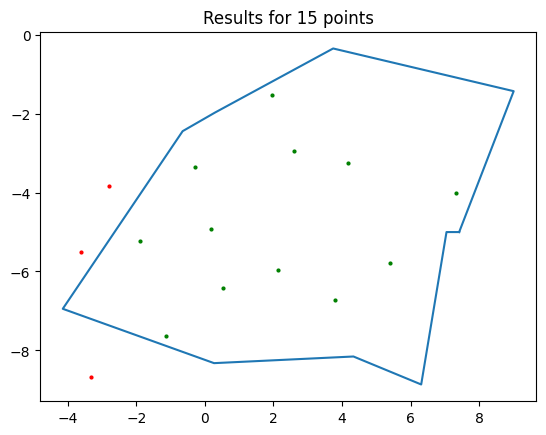

In [375]:
generate_points_and_show_result(15)

Results for 50 points:
Total area: 112.13285627525768
Calculated area: 56.06642813762883
Integral value: 3735.042376973322


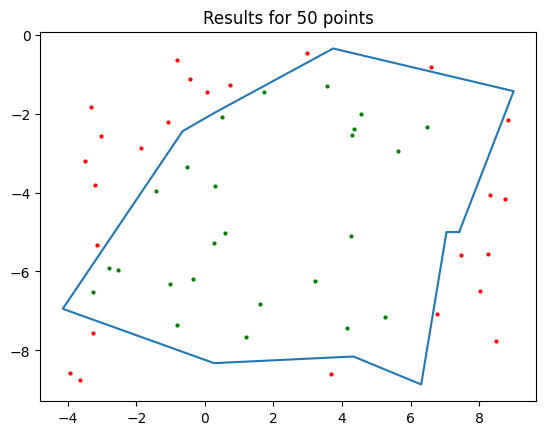

In [376]:
generate_points_and_show_result(50)

Results for 500 points:
Total area: 112.13285627525768
Calculated area: 73.55915371656904
Integral value: 8304.71852183973


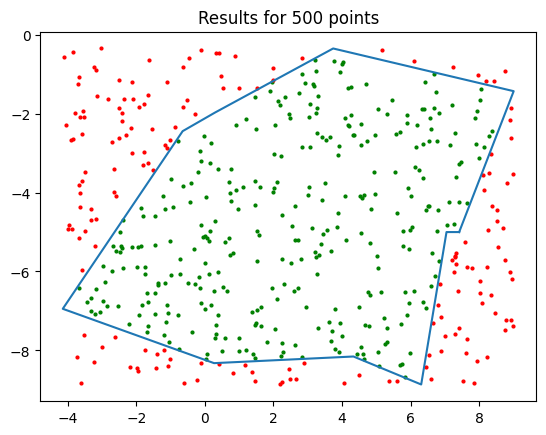

In [377]:
generate_points_and_show_result(500)

Results for 5000 points:
Total area: 112.13285627525768
Calculated area: 68.96170660928347
Integral value: 8504.225956385071


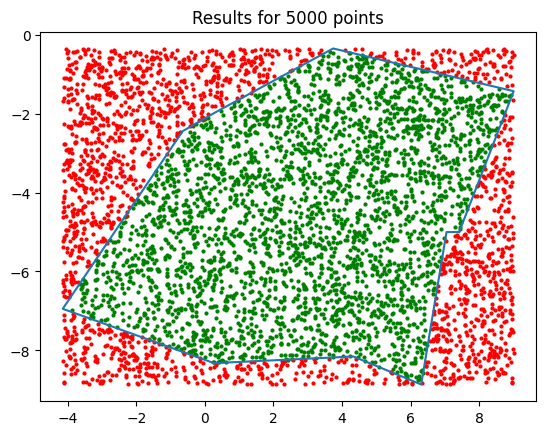

In [378]:
generate_points_and_show_result(5000)

Results for 50000 points:
Total area: 112.13285627525768
Calculated area: 68.75089683948599
Integral value: 8115.644881828395


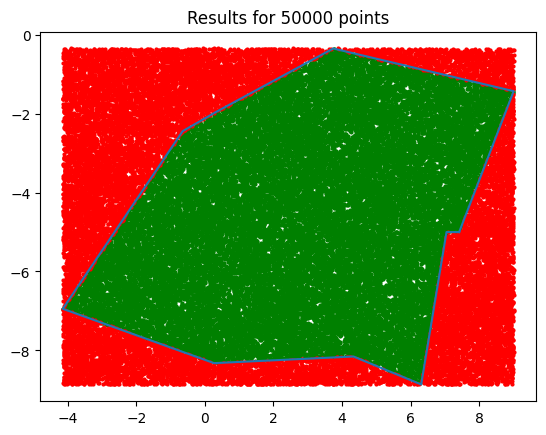

In [379]:
generate_points_and_show_result(50000)